In [2]:
import numpy as np
import kaggle
import timeit

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_svmlight_file


# Read in train and test data

def read_data_fb():
	print('Reading facebook dataset ...')
	train_x = np.loadtxt('../../Data/data.csv', delimiter=',')
	train_y = np.loadtxt('../../Data/labels.csv', delimiter=',')
	train_kaggle = np.loadtxt('../../Data/kaggle_data.csv', delimiter=',')

	return (train_x, train_y, train_kaggle)

# Compute MAE
def compute_error(y_hat, y):
	# mean absolute error
	return np.abs(y_hat - y).mean()

############################################################################

train_x, train_y, kaggle_x   = read_data_fb()
print('Train=', train_x.shape)
print('Kaggle=', kaggle_x.shape)


######### normalizing features to speed up SVM, we shouldn't normalize outputs

from sklearn.preprocessing import StandardScaler

train_x2=StandardScaler().fit_transform(train_x)
kaggle_x2=StandardScaler().fit_transform(kaggle_x)

Reading facebook dataset ...
Train= (30712, 52)
Kaggle= (10237, 52)


In [38]:
from sklearn import tree
mytree = tree.DecisionTreeRegressor()
start = timeit.default_timer()
mytree = mytree.fit(train_x,train_y)
stop = timeit.default_timer()
print("Fitting runtime for tree:",stop - start)
predicted_y=mytree.predict(kaggle_x)


Fitting runtime for tree: 1.2969519399011915


In [88]:
start = timeit.default_timer()
from sklearn.model_selection import GridSearchCV
p_grid = {'max_depth':[3,6,9,12,15]}
besttree = GridSearchCV(estimator=mytree, param_grid=p_grid, cv=5,return_train_score=True,scoring='neg_mean_absolute_error')
besttree.fit(train_x,train_y)
stop = timeit.default_timer()
print("CV runtime for tree:",stop - start)
#besttree.cv_results_


CV runtime for tree: 10.309353844026191


In [111]:
print('out of sample errors:', abs(besttree.cv_results_['mean_test_score']))
print('max depth:', [3,6,9,12,15])


sample errors: [ 6.36333874  5.05282361  5.0725102   5.34406325  5.38188355]
max depth: [3, 6, 9, 12, 15]


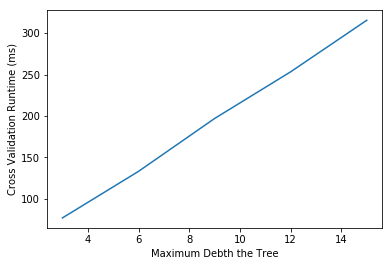

In [99]:
import matplotlib.pyplot as plt
treecv_runtimes=500*(besttree.cv_results_['mean_fit_time']+besttree.cv_results_['mean_score_time'])
plt.plot([3,6,9,12,15],treecv_runtimes)
plt.ylabel('Cross Validation Runtime (ms)')
plt.xlabel('Maximum Debth the Tree')
plt.show()

In [123]:
print('Error from CV:',(besttree.cv_results_['mean_test_score'].max())*(-1))

Error from CV: 5.05282360893


In [124]:
predicted_y=besttree.predict(kaggle_x)
file_name = '../Predictions/best.csv'
# Writing output in Kaggle format
print('Writing output to ', file_name)
kaggle.kaggleize(predicted_y, file_name)
print('Done with writing.')

Writing output to  ../Predictions/best.csv
Done with writing.


In [146]:
from sklearn import neighbors
myknn = neighbors.KNeighborsRegressor()
p_grid = {'n_neighbors':[3,5,10,20,25]}
bestknn = GridSearchCV(estimator=myknn, param_grid=p_grid, cv=5,return_train_score=True,scoring='neg_mean_absolute_error')
bestknn.fit(train_x,train_y)
print("Done with CV on KNN")

Done with CV on KNN


In [133]:
print('out of sample errors:', abs(bestknn.cv_results_['mean_test_score']))
print('number of neighbors:', [3,5,10,20,25])
print('The number of neighbors of the best KNN:', bestknn.best_params_)
predicted_y=bestknn.predict(kaggle_x)
file_name = '../Predictions/best.csv'
# Writing output in Kaggle format
print('Writing output to ', file_name)
kaggle.kaggleize(predicted_y, file_name)
print('Done with writing.')

out of sample errors: [ 6.90554181  6.79133238  7.00135778  7.29865525  7.43505861]
number of neighbors: [3, 5, 10, 20, 25]
The number of neighbors of the best KNN: {'n_neighbors': 5}
Writing output to  ../Predictions/best.csv
Done with writing.


In [134]:
bestknn.cv_results_


{'mean_fit_time': array([ 0.15042486,  0.13056006,  0.13136663,  0.13135128,  0.13096662]),
 'mean_score_time': array([ 0.23521953,  0.24785938,  0.26189528,  0.29698849,  0.31903009]),
 'mean_test_score': array([-6.90554181, -6.79133238, -7.00135778, -7.29865525, -7.43505861]),
 'mean_train_score': array([-4.69694361, -5.48778371, -6.23814213, -6.89340392, -7.11691139]),
 'param_n_neighbors': masked_array(data = [3 5 10 20 25],
              mask = [False False False False False],
        fill_value = ?),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 20},
  {'n_neighbors': 25}],
 'rank_test_score': array([2, 1, 3, 4, 5]),
 'split0_test_score': array([-6.84063161, -6.60683705, -6.73099463, -7.10052906, -7.16281296]),
 'split0_train_score': array([-4.63679162, -5.55115796, -6.30957711, -6.93950303, -7.15303513]),
 'split1_test_score': array([-7.51560041, -7.44317109, -7.73604102, -7.91150903, -8.0738727 ]),
 'split1_train_score': array([-

In [137]:
###### KNN with Manhattan Distance

myknn2 = neighbors.KNeighborsRegressor(n_neighbors=5,metric='manhattan')
myknn2.fit(train_x,train_y)
predicted_y=myknn2.predict(kaggle_x)
file_name = '../Predictions/best.csv'
# Writing output in Kaggle format
print('Writing output to ', file_name)
kaggle.kaggleize(predicted_y, file_name)
print('Done with writing.')


Writing output to  ../Predictions/best.csv
Done with writing.


In [138]:
###### KNN with Chebyshev Distance

myknn3 = neighbors.KNeighborsRegressor(n_neighbors=5,metric='chebyshev')
myknn3.fit(train_x,train_y)
predicted_y=myknn3.predict(kaggle_x)
file_name = '../Predictions/best.csv'
# Writing output in Kaggle format
print('Writing output to ', file_name)
kaggle.kaggleize(predicted_y, file_name)
print('Done with writing.')


Writing output to  ../Predictions/best.csv
Done with writing.


In [5]:
########### Ridge 

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

myridge = linear_model.Ridge()
p_grid = {'alpha':[1e-6,1e-4,1e-2,1,10]}
bestridge = GridSearchCV(estimator=myridge, param_grid=p_grid, cv=5,return_train_score=True,scoring='neg_mean_absolute_error')
bestridge.fit(train_x2,train_y)
print("Done with CV on Rdige")
#print(bestridge.cv_results_)
print(bestridge.best_params_)
print('out of sample errors:', abs(bestridge.cv_results_['mean_test_score']))
print('alpha:', [0.000001,0.0001,0.01,1,10])


Done with CV on Rdige
{'alpha': 10}
out of sample errors: [ 8.66898955  8.66898727  8.66876014  8.65697953  8.63469713]
alpha: [1e-06, 0.0001, 0.01, 1, 10]


In [10]:
########## Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
mylasso = linear_model.Lasso(tol=1)
p_grid = {'alpha':[1e-6,1e-4,1e-2,1,10]}
bestlasso = GridSearchCV(estimator=mylasso, param_grid=p_grid, cv=5,return_train_score=True,scoring='neg_mean_absolute_error')
bestlasso.fit(train_x2,train_y)
print("Done with CV on Lasso")
#print(bestridge.cv_results_)
print(bestlasso.best_params_)
print('out of sample errors:', abs(bestlasso.cv_results_['mean_test_score']))
print('alpha:', [0.000001,0.0001,0.01,1,10])


Done with CV on Lasso
{'alpha': 10}
out of sample errors: [ 9.61319133  9.61306225  9.6000836   8.90479547  8.53384472]
alpha: [1e-06, 0.0001, 0.01, 1, 10]


In [11]:
########## Best Lasso For Kaggle
mylasso2 = linear_model.Lasso(alpha=10,tol=1)
mylasso2.fit(train_x2,train_y)
predicted_y=mylasso2.predict(kaggle_x2)
file_name = '../Predictions/bestlasso.csv'
# Writing output in Kaggle format
print('Writing output to ', file_name)
kaggle.kaggleize(predicted_y, file_name)
print('Done with writing.')

Writing output to  ../Predictions/bestlasso.csv
Done with writing.


In [172]:
mylasso2.coef_

array([  2.54894699e-08,  -2.97267661e-05,  -1.52957361e-05,
         0.00000000e+00,  -0.00000000e+00,   1.96383043e-02,
         5.12110252e-02,   1.61309657e-03,   1.38516541e-02,
         0.00000000e+00,  -3.26194254e-05,   0.00000000e+00,
         8.05708229e-02,   0.00000000e+00,  -0.00000000e+00,
         1.02121583e-03,   0.00000000e+00,   2.34289738e-02,
         0.00000000e+00,  -0.00000000e+00,  -2.07449873e-02,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         4.87670974e-04,  -6.97186393e-04,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         1.95155541e-01,   0.00000000e+00,  -1.81242148e-02,
         2.59046543e-02,  -1.73968805e-01,  -1.04541524e-04,
         2.38462876e-03,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,

In [189]:
exweights_temp=np.argsort(abs(mylasso2.coef_))
exw=exweights_temp[0:4]+1
print('we can exclude the following features:',exw)

we can exclude the following features: [52 30 29 28]


In [ ]:
argwhere(abs(mylasso2.coef_).min())